<center><h1>Ejercicio 4 - Filtro FIR</h1></center>

### Diseño de filtro con pyfda
Se utilizan los siguientes parámetros en pyfda para obtener el filtro deseado.

![png](pyfda_design.png)

In [21]:
import numpy as np

# load coefficients generated with pyfda
filter_data = np.load('filter_coef.npz')

# get b and a
b = filter_data['ba'][0]
a = filter_data['ba'][1]

print("Coeficientes b = {}".format(b))
print("Coeficientes a = {}\n".format(a))

# polos y ceros
p = np.roots(a)
z = np.roots(b)

print("Los polos están ubicados en {}".format(p))
print("Los zeros están ubicados en {}\n".format(z))


Coeficientes b = [-0.04895594  0.06275537  0.29246401  0.4226075   0.29246401  0.06275537
 -0.04895594]
Coeficientes a = [1. 0. 0. 0. 0. 0. 0.]

Los polos están ubicados en [0. 0. 0. 0. 0. 0.]
Los zeros están ubicados en [ 3.67369643+0.j         -0.90905816+0.41666924j -0.90905816-0.41666924j
 -0.42295543+0.90615049j -0.42295543-0.90615049j  0.2722054 +0.j        ]



### Transformada Z del filtro
 
 $$ H(z) =\frac{-0.04895594 + 0.06275537.z^{-1} + 0.29246401.z^{-2} + 0.4226075.z^{-3} +  0.29246401.z^{-4} + 0.06275537.z^{-5} - 0.04895594.z^{-6}}{1} $$
 
El filtro es de **orden 6**, y se corresponde con un **filtro FIR tipo I** (simétrico, número impar de coeficientes en la respuesta al impulso).
 

### Diagrama de Polos y Ceros
En el diagrama se ve que todos los polos se encuentran ubicados en 0. Además se ve que se tienen 6 ceros, y que su distribución se corresponde con la de un filtro FIR tipo I.


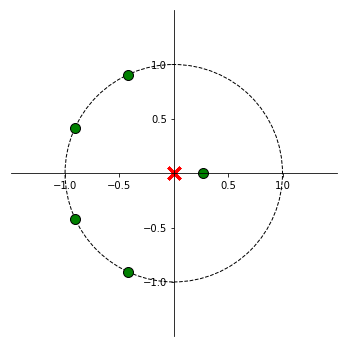

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane(b, a, filename=None):
    """
    Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

fig = plt.figure(figsize=(10,6))
z, p, k =zplane(b,a)

### Respuesta en frecuencia

Se grafica la magnitud y la fase de la respuesta en frecuencia, utilizando la función `freqz` de Numpy.

(-0.1570604579196411,
 3.298269616312463,
 -0.05172794894001599,
 1.0868897496071959)

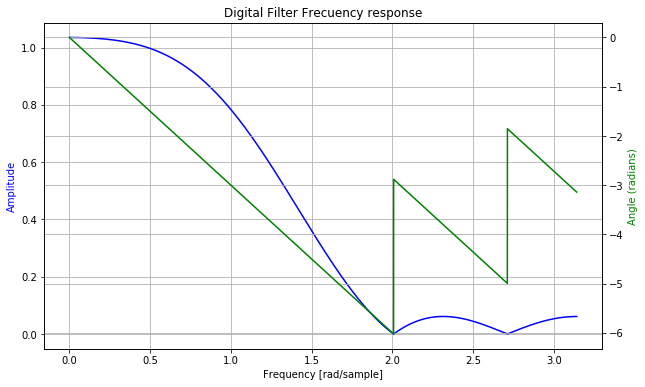

In [23]:
from scipy import signal

w, h = signal.freqz(b, a, worN=8192)
# print("Cantidad de puntos calculados: {}".format(np.size(w)))

fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
ax2.grid()
ax1.axis('tight')